# ASTR19 Notebook 2 Tutorial

### Step 1: importing numppy, astropy, and sep

In [71]:
# Import after installing astropy and sep
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

### Step 2: Following the tutorial

In [72]:
rcParams['figure.figsize'] = [10.,8]
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')
hdul = fits.open ("/Users/carrottop/Desktop/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")

In [73]:
data = hdul[0].data

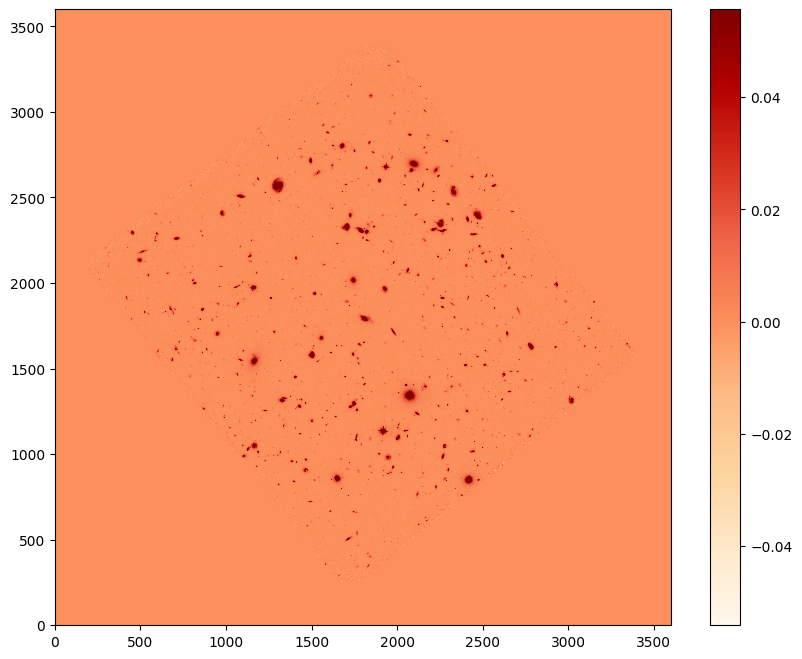

In [139]:
# producing the first image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation = "nearest", cmap = "OrRd", vmin = m - s, vmax = m+s, origin = "lower")
plt.colorbar()
plt.savefig ("astr19_final_image_4.png")

In [75]:
>>> new_data = data.astype(data.dtype.newbyteorder("="))
>>> new_data = data.byteswap()
>>> new_data = new_data.view(new_data.dtype.newbyteorder("="))
>>> data = data.byteswap()
>>> data = data.view(data.dtype.newbyteorder("="))

In [76]:
bkg = sep.Background(data)

In [77]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [78]:
bkg_image = bkg.back()

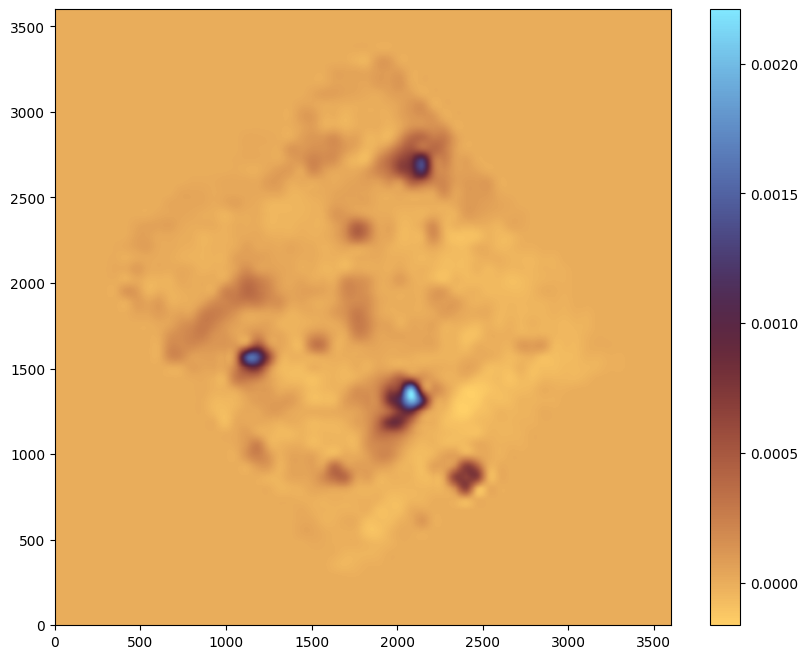

In [141]:
#producing the second image
plt.imshow(bkg_image, interpolation= 'nearest', cmap='managua', origin='lower')
plt.colorbar();
plt.savefig ("astr19_final_image_4.png")

In [80]:
bkg_rms = bkg.rms()

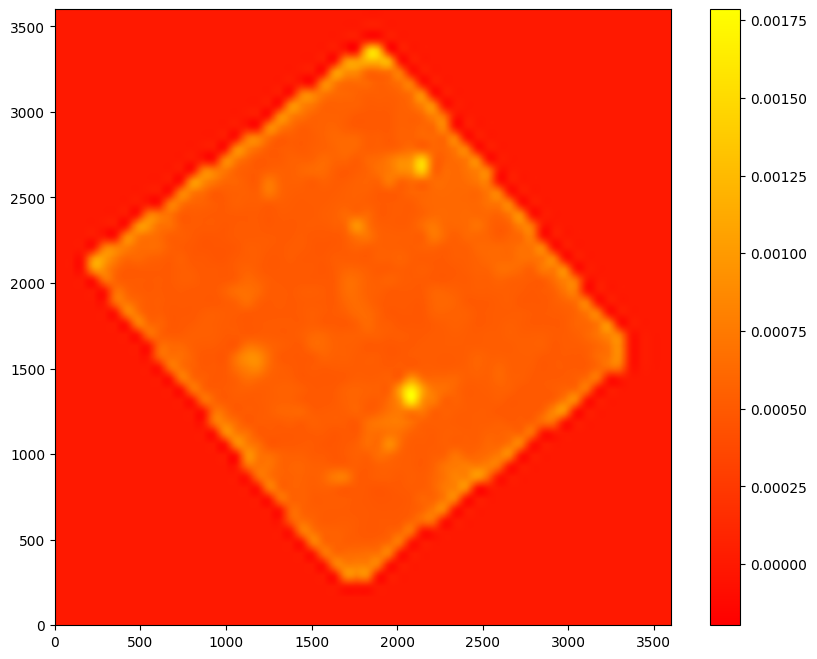

In [140]:
#producing the third image
plt.imshow(bkg_rms, interpolation='nearest', cmap='autumn', origin='lower')
plt.colorbar();
plt.savefig ("astr19_final_image_4.png")

In [82]:
data_sub = data - bkg

In [83]:
objects = sep.extract(data_sub, 5, err=bkg.globalrms)

In [84]:
len(objects)

2633

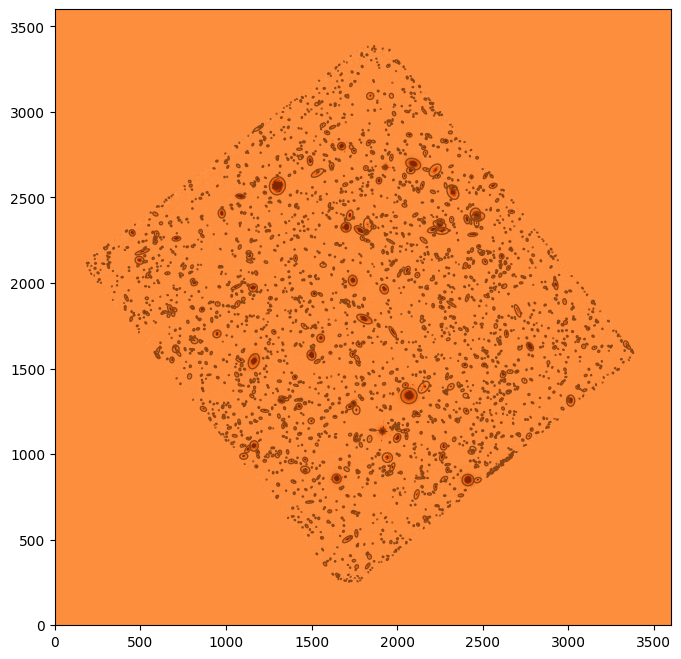

In [128]:
#object detection image
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='Oranges',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('saddlebrown')
    ax.add_artist(e)
plt.savefig ("astr19_final_image_4.png")

In [86]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [87]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

In [88]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:F}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.029248 +/- 0.171045
object 1: flux = 0.081285 +/- 0.285120
object 2: flux = 0.062260 +/- 0.249537
object 3: flux = 0.069449 +/- 0.263548
object 4: flux = 0.039489 +/- 0.198739
object 5: flux = 0.104682 +/- 0.323559
object 6: flux = 0.040038 +/- 0.200116
object 7: flux = 0.053010 +/- 0.230257
object 8: flux = 0.053288 +/- 0.230859
object 9: flux = 0.042534 +/- 0.206259


### Step 3: Creating the Histogram

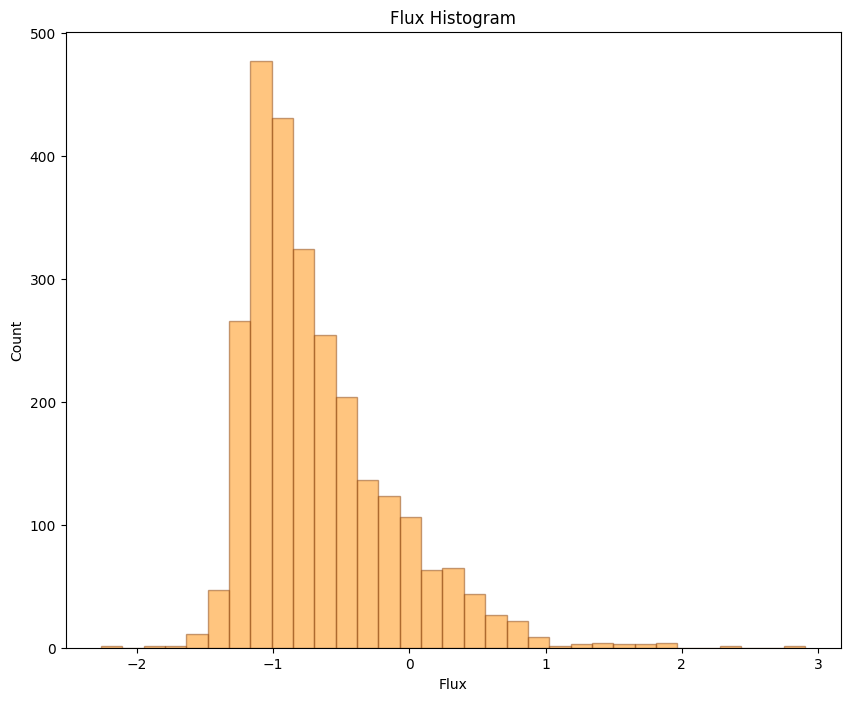

<Figure size 500x500 with 0 Axes>

In [145]:
#plotting the histogram
plt.figure()
flux_clean = flux[flux > 0] 
log10_flux = np.log10(flux_clean)
plt.hist(log_flux, bins=33, color='darkorange', edgecolor="saddlebrown", alpha=0.5)
plt.xlabel("Flux")
plt.ylabel("Count")
plt.title("Flux Histogram")
plt.figure(figsize=(5,5))
plt.savefig("flux_hist.pdf")

### Step 4: Find mean, median, and standard devation

In [94]:
print((np.mean(flux)))
print(np.std(flux))
print(np.var(flux))

1.1440098377721029
16.72298646405043
279.65827627681387


### Creating the 3-Color false image

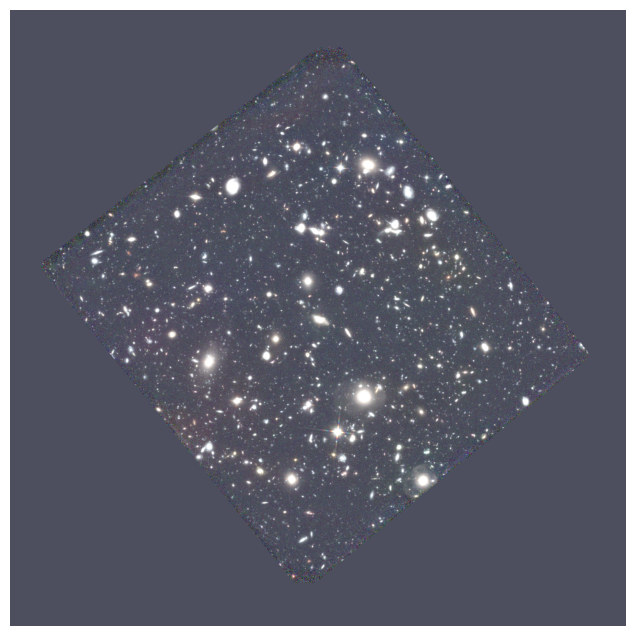

In [172]:
f105 = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
f125 = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
f160 = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")

def normalize(img, lo=0.1, hi=99.5):
    img = np.nan_to_num(img)
    vmin, vmax = np.percentile(img, (lo, hi))
    img = np.clip((img - vmin) / (vmax - vmin), 0, 1)
    return img

R = normalize(f160)
G = normalize(f125)
B = normalize(f105)

stretch = lambda x: np.arcsinh(15 * x) / np.arcsinh(15)

R = stretch(R)
G = stretch(G)
B = stretch(B)

rgb = np.dstack([R, G, B])

plt.figure(figsize=(8,8))
plt.imshow(rgb, origin="lower")
plt.axis("off")
plt.show()

plt.imsave("UDF_RGB_corrected.png", rgb)